<a href="https://colab.research.google.com/github/Chaa00/CNN-ConvNet-MNIST/blob/main/ConvNet_MNIST_MHALLAChadha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf 
from tensorflow import keras 
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
import numpy as np
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
print("the shape of X_train is " , X_train.shape)
print("the shape of X_test is " , X_train.shape)

the shape of X_train is  (60000, 28, 28)
the shape of X_test is  (60000, 28, 28)


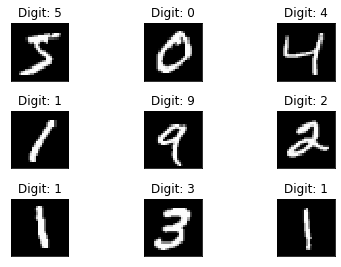

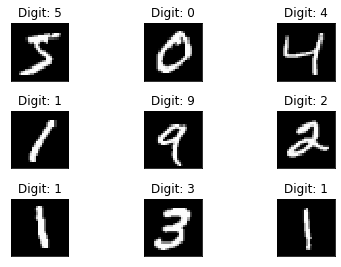

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [64]:
print(X_train[0])
print("the value related to X_train[0] is : ", y_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In the left top corner the image of '5' is  X_train[0] and y_train[0] contains label '5'. So as we did the last time our model should be able to take the handwritten image and predict the actual digit written

The input shape that a CNN accepts should be in a specific format which is our case here (batch, height, width, channels)
So let's reshape our input!

In [40]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

 y_train and y_test need to be converted into categorical formats like label '3' should be converted to a vector [0,0,0,1,0,0,0,0,0,0,0] for model building that's why we use to_categorical

In [43]:
y_train =tf.keras.utils.to_categorical(y_train, 10)
y_test =tf.keras.utils.to_categorical(y_test, 10)

Let's build our model!

In [49]:
model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
#32 plane for the first layer , convolution filters used each of size 3x3

model.add(Conv2D(64, (3, 3), activation='relu'))
#64 plane for the second layer convolution filters used each of size 3x3
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [50]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

In [51]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

Another technique to reduce over-fitting called Data Augmentation. Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and not remember specific data. That's why i imported ImageDataGenerator from Keras.

In [52]:
train_generator = gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

In [55]:
history= model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0910 - accuracy: 0.9737 - val_loss: 0.0814 - val_accuracy: 0.9766
Epoch 2/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0758 - val_accuracy: 0.9809
Epoch 3/5
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.1046 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 209s 111ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0902 - val_accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0955 - val_accuracy: 0.9803


In [56]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.09550933539867401
Test accuracy: 0.9803000092506409


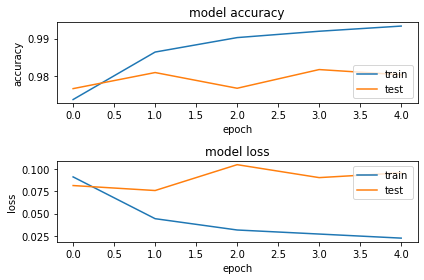

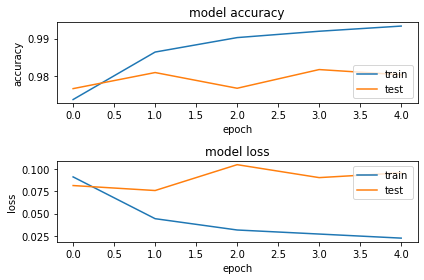

In [59]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig